In [127]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, auc
# from sklearn.metrics import roc_curve, auc
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
! pip install lifelines
from lifelines import CoxPHFitter

In [128]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [129]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2
0,10001000,F,White British,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001128,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10001482,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False
7,10001901,M,NaN,A,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,10002351,F,NaN,A,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [130]:
df.shape

(33690, 80)

In [131]:
df.isna().sum()

PATIENTID                       0
SEX                             0
ETHNICITY                    1960
NEWVITALSTATUS                  0
NUMBER_TUMOURS                  0
C180                            0
C181                            0
C182                            0
C183                            0
C184                            0
C185                            0
C186                            0
C187                            0
C188                            0
BEH_BENIGN                      0
BEH_MALIG                       0
BEH_MICINV                      0
BEH_INSITU                      0
BEH_UNCERT                      0
T0                              0
T1                              0
T2                              0
T3                              0
T4                              0
N0                              0
N1                              0
N2                              0
N3                              0
M1                              0
STAGE0        

In [132]:
df.dtypes

PATIENTID                       int64
SEX                          category
ETHNICITY                    category
NEWVITALSTATUS               category
NUMBER_TUMOURS                  int64
C180                             bool
C181                             bool
C182                             bool
C183                             bool
C184                             bool
C185                             bool
C186                             bool
C187                             bool
C188                             bool
BEH_BENIGN                       bool
BEH_MALIG                        bool
BEH_MICINV                       bool
BEH_INSITU                       bool
BEH_UNCERT                       bool
T0                               bool
T1                               bool
T2                               bool
T3                               bool
T4                               bool
N0                               bool
N1                               bool
N2          

In [133]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    25237
1     8453
Name: DEAD, dtype: int64

In [134]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001128,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001482,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0
7,10001901,M,NaN,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,62.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,1.325147,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
8,10002351,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,63.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,1.158135,29.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [135]:
df['CANCER_YEARS_MEDIAN'].describe()

count    33690.000000
mean         2.077229
std          1.117319
min          0.000000
25%          1.251224
50%          2.072596
75%          3.005537
max          4.043889
Name: CANCER_YEARS_MEDIAN, dtype: float64

In [136]:
df.shape

(33690, 80)

In [137]:
horizon = 2

In [138]:
df = df[((df['DEAD'] == 1) & (df['CANCER_YEARS_MEDIAN'] <= horizon)) | ((df['DEAD'] == 0) & (df['CANCER_YEARS_MEDIAN'] >= horizon))]
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD
0,10001000,F,White British,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001128,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10001482,F,NaN,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0
9,10002391,M,White British,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,40.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2.083547,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
10,10002619,M,White British,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2.089023,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [139]:
# df = df[((df['DEAD'] == 1) & (df['CANCER_YEARS_MEDIAN'] <= horizon)) | (df['DEAD'] == 0)]
# df.head()

In [140]:
df.shape

(24349, 80)

In [141]:
df['DEAD'].value_counts()

0    16674
1     7675
Name: DEAD, dtype: int64

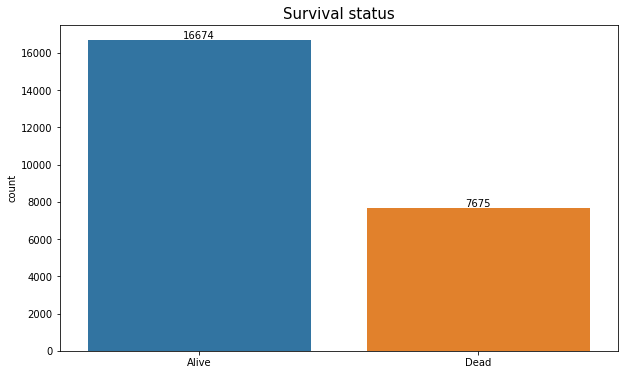

In [142]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Survival status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, height, ha="center")

In [143]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 68.48
Percentage of patients classified as dead: 31.52


In [144]:
new_memory = df.memory_usage(deep = True).sum() / 1024 ** 2 
print('Memory used: %.1f GB' % new_memory)

Memory used: 3.8 GB


In [145]:
df.columns

Index(['PATIENTID', 'SEX', 'ETHNICITY', 'NUMBER_TUMOURS', 'C180', 'C181',
       'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN',
       'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2',
       'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2',
       'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4',
       'AGE_MEDIAN', 'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201',
       'L0301', 'L0901', 'CURATIVE_TREAT', 'NONCURATIVE_TREAT',
       'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1',
       'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 'CANCER_YEARS_MEDIAN',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD'],
      dtype='ob

In [146]:
df = pd.concat([df[['PATIENTID', 'NUMBER_TUMOURS', 'C180', 
       'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 
       'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV', 'BEH_INSITU', 'BEH_UNCERT', 
       'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1', 'N2', 'N3', 'M1', 
       'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4', 'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN',
       'L0801', 'L1001', 'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901',
       'CURATIVE_TREAT', 'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT',
       'ECOG0', 'ECOG1', 'ECOG2', 'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5', 
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN',
       'BMI', 'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'DEAD']],                      
        pd.get_dummies(df['ETHNICITY'], prefix = 'ETHNICITY'),
        pd.get_dummies(df['SEX'], prefix = 'SEX')
        ], axis = 1)
df.head()

# df.drop(['SEX', 'ETHNICITY'], axis = 1)

,PATIENTID,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,DEAD,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
0,10001000,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,3.857711,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,10001128,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,2.234132,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,10001482,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,3.022649,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10002391,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,40.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,2.083547,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10,10002619,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,2.089023,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [147]:
df.isna().sum()

PATIENTID                                  0
NUMBER_TUMOURS                             0
C180                                       0
C181                                       0
C182                                       0
C183                                       0
C184                                       0
C185                                       0
C186                                       0
C187                                       0
C188                                       0
BEH_BENIGN                                 0
BEH_MALIG                                  0
BEH_MICINV                                 0
BEH_INSITU                                 0
BEH_UNCERT                                 0
T0                                         0
T1                                         0
T2                                         0
T3                                         0
T4                                         0
N0                                         0
N1        

In [148]:
# undersampling = OneSidedSelection(n_neighbors=1, n_seeds_S=20)

In [149]:
# oversampling = SMOTE()

In [150]:
# logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=10000) 

In [151]:
# GBC = GradientBoostingClassifier(loss="exponential", n_estimators=1000, learning_rate=0.01)

In [152]:
# pipeline = Pipeline([('OneSidedSelection', undersampling), ('LogisticRegression', logr)])

In [153]:
# pipeline = Pipeline([('SMOTE', oversampling), ('LogisticRegression', logr)])

In [154]:
# clf = pipeline

In [155]:
# clf.fit(X_train, y_train)

In [156]:
# cv = StratifiedKFold(n_splits=3)
# # accuracy = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy").mean()
# recall = cross_val_score(clf, X_train, y_train, cv=cv, scoring="recall").mean()
# precision = cross_val_score(clf, X_train, y_train, cv=cv, scoring="precision").mean()
# # f1 = cross_val_score(clf, X_train, y_train, cv=cv, scoring="f1").mean()
# # print('Accuracy: %.3f' % accuracy)
# print('Recall: %.3f' % recall)
# print('Precision: %.3f' % precision)
# # print('F1-score: %.3f' % f1)

In [157]:
# y_predicted = clf.predict(X_train)

In [158]:
# print(np.unique(y_predicted))

In [159]:
# confusion_matrix = sklearn.metrics.confusion_matrix(y_train, y_predicted, labels=[True, False]) 
# print(confusion_matrix)

In [160]:
# true_positives, false_negatives, false_positives, true_negatives = confusion_matrix.ravel()
# print('True positives: %d' % true_positives)
# print('True negatives: %d' % true_negatives)
# print('False positives: %d' % false_positives)
# print('False negatives: %d' % false_negatives)

In [161]:
# from matplotlib.colors import LogNorm

# def plot_confusion_matrix(confusion_matrix, target_names=['Dead', 'Alive'], 
#         title='Confusion matrix'):    
#             fig, ax = plt.subplots()    
#             image = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', norm=LogNorm())    
#             ax.set_title(title)    
#             fig.colorbar(image)    
#             tick_marks = np.arange(len(target_names))    
#             ax.set_xticks(tick_marks)    
#             ax.set_xticklabels(target_names, rotation=0)    
#             ax.set_yticks(tick_marks)    
#             ax.set_yticklabels(target_names, rotation=0)    
#             ax.set_ylabel('True label')    
#             ax.set_xlabel('Predicted label')    
#             return fig, ax

In [162]:
# _ = plot_confusion_matrix(confusion_matrix)

In [163]:
# clf.feature_importances_

In [164]:
# list(zip(X_train.columns.to_list(),clf.feature_importances_))

In [165]:
# sorted(zip(X_train.columns.to_list(), clf.feature_importances_), key = lambda x: x[1]) 

In [166]:
# # Plot feature importance
# feature_importance = clf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.asarray(X_train.columns.to_list())[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.gcf().set_size_inches(15,20)
# plt.show()

In [167]:
# df1.sum()

In [168]:
# X = df[['NUMBER_TUMOURS','SC500','SC501','SC502','SC503','SC504','SC505','SC506','SC508',
#  'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
#  'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
#  'GRADE1','GRADE2','GRADE3','GRADE4','AGE_MEAN','L0801','L1001','L1701',
#  'L0201','L0401','L1201','L0301','L0901','ER_POS','PR_POS','HER_POS',
#  'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4','ACE0','ACE1',
#  'ACE2','ACE3','LEFT','RIGHT','MIDLINE','BILATERAL','DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
#  'BMI','NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT',
#  'DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES','CHEMOTHERAPY2','TARGETED2','CHEM_TARG2',
#  'CHEM_RADIO2','TARG_RADIO2','CHEM_RADIO_TARG2','HORM_TARG2','HORMONE2','OTHER2',
#  'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian', 
#  'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
#  'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
#  'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
#  'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
#  'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean']]

In [169]:
df.shape

(24349, 98)

In [170]:
df.columns

Index(['PATIENTID', 'NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184',
       'C185', 'C186', 'C187', 'C188', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV',
       'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1',
       'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT',
       'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2',
       'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'CANCER_YEARS_MEDIAN', 'DIAG_TO_SURG_DAYS_MEDIAN',
       'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI', 'NEOADJUVANT', 'DIAGNOSTIC',
       'PALLIATIVE', 'CURATIVE', 'ADJUVANT', 'DISEASE_MOD', 'STAGING',
       'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2', 'TARGETED2', 'CHEM_TARG2',
       'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2', 'OTHER2', 'DEAD',
       'ETHNICITY_Asian Bangladeshi', 'ETHN

In [171]:
X = df.drop(columns=['PATIENTID', 'DEAD', 'CANCER_YEARS_MEDIAN'])

In [172]:
y = df['DEAD']

In [173]:
X.shape

(24349, 95)

In [174]:
X.head()

,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,HORMONE2,OTHER2,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,79.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,120.0,472.5,20.910494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,77.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,0.0,596.5,33.930521,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,40.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,86.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [109]:
y_train.value_counts()

0    13327
1     6152
Name: DEAD, dtype: int64

In [110]:
y_test.value_counts()

0    3347
1    1523
Name: DEAD, dtype: int64

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [176]:
y.value_counts(normalize=True)

0    0.684792
1    0.315208
Name: DEAD, dtype: float64

In [177]:
y_train.value_counts(normalize=True)

0    0.684789
1    0.315211
Name: DEAD, dtype: float64

In [178]:
y_test.value_counts(normalize=True)

0    0.684805
1    0.315195
Name: DEAD, dtype: float64

In [179]:
df.shape

(24349, 98)

In [180]:
X.columns

Index(['NUMBER_TUMOURS', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185',
       'C186', 'C187', 'C188', 'BEH_BENIGN', 'BEH_MALIG', 'BEH_MICINV',
       'BEH_INSITU', 'BEH_UNCERT', 'T0', 'T1', 'T2', 'T3', 'T4', 'N0', 'N1',
       'N2', 'N3', 'M1', 'STAGE0', 'STAGE1', 'STAGE2', 'STAGE3', 'STAGE4',
       'GRADE1', 'GRADE2', 'GRADE3', 'GRADE4', 'AGE_MEDIAN', 'L0801', 'L1001',
       'L1701', 'L0201', 'L0401', 'L1201', 'L0301', 'L0901', 'CURATIVE_TREAT',
       'NONCURATIVE_TREAT', 'NO_ACTIVE_TREAT', 'ECOG0', 'ECOG1', 'ECOG2',
       'ECOG3', 'ECOG4', 'DEPR1', 'DEPR2', 'DEPR3', 'DEPR4', 'DEPR5',
       'DIAG_TO_SURG_DAYS_MEDIAN', 'DIAG_TO_TREAT_DAYS_MEDIAN', 'BMI',
       'NEOADJUVANT', 'DIAGNOSTIC', 'PALLIATIVE', 'CURATIVE', 'ADJUVANT',
       'DISEASE_MOD', 'STAGING', 'CT_YES', 'CHEM_RAD_YES', 'CHEMOTHERAPY2',
       'TARGETED2', 'CHEM_TARG2', 'CHEM_RADIO2', 'TARG_RADIO2', 'HORMONE2',
       'OTHER2', 'ETHNICITY_Asian Bangladeshi', 'ETHNICITY_Asian Indian',
       'ETHNICITY_Asian Pakist

In [220]:
list_cat = ['C180', 'C181', 'C182', 'C183', 'C184','C185', 'C186', 'C187', 'C188',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901',
 'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
 'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES',
 'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean', 'SEX_F', 'SEX_M']

In [221]:
X_train_cat = X_train[list_cat]

In [222]:
X_test_cat = X_test[list_cat]

In [225]:
list_num = ['NUMBER_TUMOURS','AGE_MEDIAN','BMI', 'DIAG_TO_SURG_DAYS_MEDIAN','DIAG_TO_TREAT_DAYS_MEDIAN']

In [226]:
X_train_num = X_train[list_num]

In [227]:
X_test_num = X_test[list_num]

In [228]:
X_train_cat.shape

(19479, 83)

In [229]:
X_test_cat.shape

(4870, 83)

In [230]:
X_train_num.shape

(19479, 5)

In [231]:
X_test_num.shape

(4870, 5)

In [232]:
fs_num = SelectKBest(score_func = f_classif, k = 'all')
fs_num.fit(X_train_num, y_train)
# features = x_train.columns[selection.get_support()]
# print(features)
# X_train_fs_num = fs_num.transform(X_train_num)
# X_test_fs_num = fs_num.transform(X_test_num)

SelectKBest(k='all', score_func=<function f_classif at 0x7f96c177f710>)

In [233]:
for n,s in zip(X_train_num.columns, fs_num.scores_):
    print('Score: %.3f for feature %s' % (s,n))

Score: 92.355 for feature NUMBER_TUMOURS
Score: 272.583 for feature AGE_MEDIAN
Score: 0.431 for feature BMI
Score: 211.453 for feature DIAG_TO_SURG_DAYS_MEDIAN
Score: 114.678 for feature DIAG_TO_TREAT_DAYS_MEDIAN


In [234]:
result_num = list_num

In [736]:
# result_num

In [737]:
# result_num = []
# for n,s in zip(X_train_num.columns, fs_num.scores_):
#     if s > 1:
#         result_num.append(n)
#         print('Score: %.3f for feature %s' % (s,n))
#     else:
#         print('Score: %.3f for feature %s' % (s,n))

In [738]:
# for i in range(len(fs_num.scores_)):
#     print('Feature %d: %f' % (i, fs_num.scores_[i]))

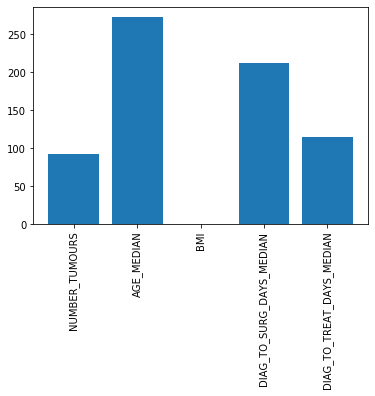

In [236]:
plt.bar([i for i in range(len(fs_num.scores_))], fs_num.scores_)
plt.xticks(range(5), ['NUMBER_TUMOURS','AGE_MEDIAN','BMI', 'DIAG_TO_SURG_DAYS_MEDIAN','DIAG_TO_TREAT_DAYS_MEDIAN'], 
           rotation = 90)
plt.show()

In [237]:
fs_cat = SelectKBest(score_func = chi2, k = 'all')
fs_cat.fit(X_train_cat, y_train)
# X_train_fs_cat = fs_cat.transform(X_train_cat)
# X_test_fs_cat = fs_cat.transform(X_test_cat)

SelectKBest(k='all', score_func=<function chi2 at 0x7f96c177f290>)

In [238]:
limit = 5

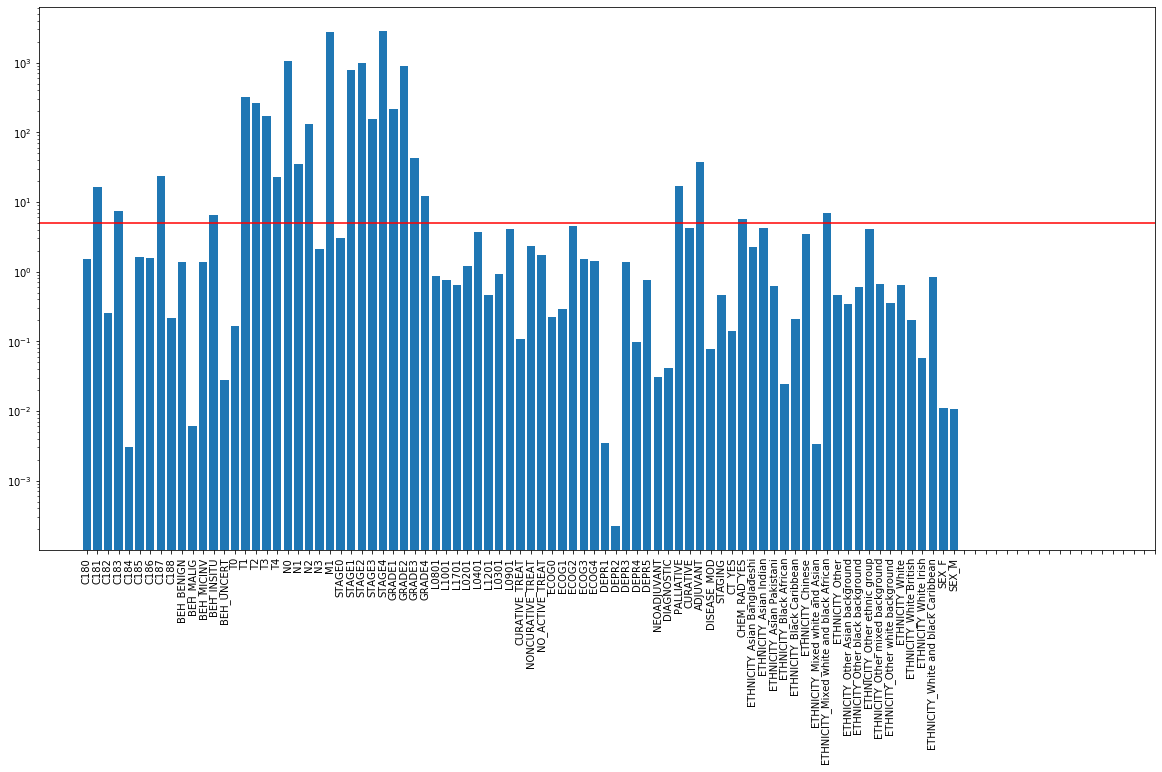

In [239]:
plt.figure(figsize=(20,10))
plt.bar([i for i in range(len(fs_cat.scores_))], fs_cat.scores_)
plt.xticks(range(102), ['C180', 'C181', 'C182', 'C183', 'C184','C185', 'C186', 'C187', 'C188',
 'BEH_BENIGN','BEH_MALIG','BEH_MICINV','BEH_INSITU','BEH_UNCERT','T0','T1','T2','T3','T4',
 'N0','N1','N2','N3','M1','STAGE0','STAGE1','STAGE2','STAGE3','STAGE4',
 'GRADE1','GRADE2','GRADE3','GRADE4','L0801','L1001','L1701',
 'L0201','L0401','L1201','L0301','L0901',
 'CURATIVE_TREAT','NONCURATIVE_TREAT','NO_ACTIVE_TREAT','ECOG0','ECOG1','ECOG2','ECOG3','ECOG4',
 'DEPR1','DEPR2','DEPR3','DEPR4','DEPR5',
 'NEOADJUVANT','DIAGNOSTIC','PALLIATIVE','CURATIVE','ADJUVANT','DISEASE_MOD','STAGING','CT_YES','CHEM_RAD_YES',
 'ETHNICITY_Asian Bangladeshi','ETHNICITY_Asian Indian',
 'ETHNICITY_Asian Pakistani','ETHNICITY_Black African','ETHNICITY_Black Caribbean','ETHNICITY_Chinese',
 'ETHNICITY_Mixed white and Asian','ETHNICITY_Mixed white and black African','ETHNICITY_Other',
 'ETHNICITY_Other Asian background','ETHNICITY_Other black background','ETHNICITY_Other ethnic group',
 'ETHNICITY_Other mixed background','ETHNICITY_Other white background','ETHNICITY_White',
 'ETHNICITY_White British','ETHNICITY_White Irish','ETHNICITY_White and black Caribbean', 'SEX_F', 'SEX_M'], rotation = 90)
plt.axhline(y = limit, color = 'red')
plt.gca().set_yscale('log')
plt.show()

In [240]:
# what are scores for the features
result_cat = []
for n,s in zip(X_train_cat.columns, fs_cat.scores_):
    if s > limit:
        result_cat.append(n)
        print('Score: %.3f for feature %s' % (s,n))
    else:
        print('Score: %.3f for feature %s' % (s,n))

Score: 1.495 for feature C180
Score: 16.567 for feature C181
Score: 0.255 for feature C182
Score: 7.415 for feature C183
Score: 0.003 for feature C184
Score: 1.635 for feature C185
Score: 1.556 for feature C186
Score: 23.409 for feature C187
Score: 0.217 for feature C188
Score: 1.380 for feature BEH_BENIGN
Score: 0.006 for feature BEH_MALIG
Score: 1.380 for feature BEH_MICINV
Score: 6.513 for feature BEH_INSITU
Score: 0.028 for feature BEH_UNCERT
Score: 0.167 for feature T0
Score: 321.149 for feature T1
Score: 264.097 for feature T2
Score: 168.408 for feature T3
Score: 22.673 for feature T4
Score: 1065.304 for feature N0
Score: 34.976 for feature N1
Score: 129.405 for feature N2
Score: 2.093 for feature N3
Score: 2752.979 for feature M1
Score: 3.063 for feature STAGE0
Score: 778.246 for feature STAGE1
Score: 1000.155 for feature STAGE2
Score: 155.557 for feature STAGE3
Score: 2798.780 for feature STAGE4
Score: 215.177 for feature GRADE1
Score: 893.902 for feature GRADE2
Score: 42.435 f

In [241]:
result_cat 

['C181',
 'C183',
 'C187',
 'BEH_INSITU',
 'T1',
 'T2',
 'T3',
 'T4',
 'N0',
 'N1',
 'N2',
 'M1',
 'STAGE1',
 'STAGE2',
 'STAGE3',
 'STAGE4',
 'GRADE1',
 'GRADE2',
 'GRADE3',
 'GRADE4',
 'PALLIATIVE',
 'ADJUVANT',
 'CHEM_RAD_YES',
 'ETHNICITY_Mixed white and black African']

In [745]:
X_train.shape

(22649, 103)

In [746]:
columns = result_num + result_cat
columns

['NUMBER_TUMOURS',
 'AGE_MEAN',
 'BMI',
 'T1',
 'T3',
 'T4',
 'N0',
 'N3',
 'M1',
 'STAGE1',
 'STAGE2',
 'STAGE4']

In [747]:
X_train = X_train[columns]

In [35]:
X_train.shape

(19479, 96)

In [36]:
X_test.shape

(4870, 96)

In [750]:
X_test = X_test[columns]

In [751]:
X_test.shape

(5663, 12)

In [181]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=10000) 

In [182]:
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [183]:
cv = 3
accuracy_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="accuracy").mean()
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="recall").mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="precision").mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="f1").mean()
print('Accuracy: %.3f' % accuracy_logr)
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Accuracy: 0.790
Recall: 0.800
Precision: 0.631
F1-score: 0.706


In [52]:
logr.coef_

array([[-4.78422677e-10,  8.09936753e-20,  1.14684260e-17,
        -6.97809294e-18,  7.40691759e-18,  5.86849384e-18,
         1.48876414e-18, -4.07981942e-19, -3.25846434e-18,
        -3.01303911e-17,  3.14051348e-19, -1.10156660e-19,
         1.55548387e-17, -1.08481843e-19, -8.66487644e-19,
        -1.50635480e-19,  2.30522076e-20, -5.78820033e-17,
        -5.76700332e-17, -8.71033799e-17,  3.14893215e-17,
        -2.43722837e-16,  3.34682107e-17,  5.15294694e-17,
         6.59833487e-19,  2.78548117e-16, -8.97952513e-19,
        -1.15932187e-16, -1.84067973e-16, -6.62136583e-17,
         2.85155714e-16, -4.11885653e-17, -2.55684743e-16,
         3.56673780e-17,  1.56427710e-18,  3.53952749e-15,
        -6.01118788e-18,  3.17081961e-18,  7.47565123e-18,
         9.28764596e-18, -4.75980181e-18,  4.05576111e-18,
         5.46453386e-18, -4.24341274e-18,  5.28976779e-18,
         2.24679831e-19,  2.10434975e-18,  4.09982936e-18,
         2.20147393e-18, -2.07688684e-18, -7.40554726e-1

In [55]:
list(zip(X_train.columns.to_list(),logr.coef_))

[('PATIENTID',
  array([-4.78422677e-10,  8.09936753e-20,  1.14684260e-17, -6.97809294e-18,
          7.40691759e-18,  5.86849384e-18,  1.48876414e-18, -4.07981942e-19,
         -3.25846434e-18, -3.01303911e-17,  3.14051348e-19, -1.10156660e-19,
          1.55548387e-17, -1.08481843e-19, -8.66487644e-19, -1.50635480e-19,
          2.30522076e-20, -5.78820033e-17, -5.76700332e-17, -8.71033799e-17,
          3.14893215e-17, -2.43722837e-16,  3.34682107e-17,  5.15294694e-17,
          6.59833487e-19,  2.78548117e-16, -8.97952513e-19, -1.15932187e-16,
         -1.84067973e-16, -6.62136583e-17,  2.85155714e-16, -4.11885653e-17,
         -2.55684743e-16,  3.56673780e-17,  1.56427710e-18,  3.53952749e-15,
         -6.01118788e-18,  3.17081961e-18,  7.47565123e-18,  9.28764596e-18,
         -4.75980181e-18,  4.05576111e-18,  5.46453386e-18, -4.24341274e-18,
          5.28976779e-18,  2.24679831e-19,  2.10434975e-18,  4.09982936e-18,
          2.20147393e-18, -2.07688684e-18, -7.40554726e-19, -

In [89]:
X_train.head()

,PATIENTID,NUMBER_TUMOURS,C180,C181,C182,C183,C184,C185,C186,C187,C188,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEDIAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_YEARS_MEDIAN,DIAG_TO_SURG_DAYS_MEDIAN,DIAG_TO_TREAT_DAYS_MEDIAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,ETHNICITY_Asian Bangladeshi,ETHNICITY_Asian Indian,ETHNICITY_Asian Pakistani,ETHNICITY_Black African,ETHNICITY_Black Caribbean,ETHNICITY_Chinese,ETHNICITY_Mixed white and Asian,ETHNICITY_Mixed white and black African,ETHNICITY_Other,ETHNICITY_Other Asian background,ETHNICITY_Other black background,ETHNICITY_Other ethnic group,ETHNICITY_Other mixed background,ETHNICITY_Other white background,ETHNICITY_White,ETHNICITY_White British,ETHNICITY_White Irish,ETHNICITY_White and black Caribbean,SEX_F,SEX_M
15674,60030096,1,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,62.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,3.783787,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15127,60028849,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,60.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,2.724217,24.0,57.0,25.314640,False,False,False,True,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
16391,60031733,1,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,84.0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,3.945324,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
11530,60020673,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,89.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,2.688625,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
30718,60061618,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,65.0,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,2.759810,0.0,175.0,26.218821,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [757]:
# sorted(sklearn.metrics.SCORERS.keys())

In [90]:
y_predicted = logr.predict(X_test)

In [91]:
print(np.unique(y_predicted))

[0]


In [92]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[   0 1510]
 [   0 3360]]


In [93]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 0
True negatives: 3360
False positives: 0
False negatives: 1510


In [94]:
from matplotlib.colors import LogNorm

def plot_confusion_matrix(logr_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

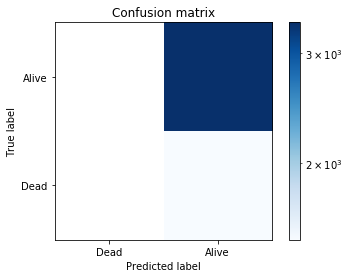

In [95]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [794]:
# logr_confusion_matrix_normalized = logr_confusion_matrix / logr_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(logr_confusion_matrix_normalized)

In [795]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = logr_confusion_matrix_normalized.ravel()
# print('True positives rate: %.2f' % (true_positives_rate * 100))
# print('True negatives rate: %.2f' % (true_negatives_rate * 100))
# print('False positives rate: %.2f' % (false_positives_rate * 100))
# print('False negatives rate: %.2f' % (false_negatives_rate * 100))

In [796]:
# _ = plot_confusion_matrix(logr_confusion_matrix_normalized, title="Normalized confusion matrix")

In [96]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.69      1.00      0.82      3360
        Dead       0.00      0.00      0.00      1510

    accuracy                           0.69      4870
   macro avg       0.34      0.50      0.41      4870
weighted avg       0.48      0.69      0.56      4870



/home/elsa/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
y_predicted_proba_logr = logr.predict_proba(X_test)

In [98]:
y_predicted_proba_logr.shape

(4870, 2)

In [99]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Logistic Regression')    
    ax.legend(loc="lower right")    
    return fig, ax

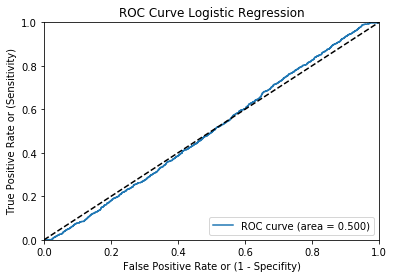

In [100]:
_ = plot_roc_curve(y_test, y_predicted_proba_logr)

In [802]:
logr_grid = GridSearchCV(logr, param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3000, 4000]},
                        cv = 3, scoring = 'precision') 

In [803]:
logr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 3000,
                               4000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [804]:
print('Best precision score: %.3f' % logr_grid.best_score_) 
print('Best parameters: %s' % logr_grid.best_params_)

Best precision score: 0.036
Best parameters: {'C': 0.1}


In [805]:
logr = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=1000, C=1000) 

In [806]:
logr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [807]:
cv = 3
recall_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="recall").mean()
precision_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="precision").mean()
f1_logr = cross_val_score(logr, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_logr)
print('Precision: %.3f' % precision_logr)
print('F1-score: %.3f' % f1_logr)

Recall: 0.668
Precision: 0.035
F1-score: 0.067


In [808]:
y_predicted = logr.predict(X_test)

In [809]:
logr_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(logr_confusion_matrix)

[[  48   16]
 [1164 4435]]


In [810]:
true_positives, false_negatives, false_positives, true_negatives = logr_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 48
True negatives: 4435
False positives: 1164
False negatives: 16


In [811]:
from matplotlib.colors import LogNorm

def plot_confusion_matrix(logr_confusion_matrix, target_names=['Dead', 'Alive'], 
        title='Confusion matrix'):    
            fig, ax = plt.subplots()    
            image = ax.imshow(logr_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, origin='bottom', norm=LogNorm())    
            ax.set_title(title)    
            fig.colorbar(image)    
            tick_marks = np.arange(len(target_names))    
            ax.set_xticks(tick_marks)    
            ax.set_xticklabels(target_names, rotation=0)    
            ax.set_yticks(tick_marks)    
            ax.set_yticklabels(target_names, rotation=0)    
            ax.set_ylabel('True label')    
            ax.set_xlabel('Predicted label')    
            return fig, ax

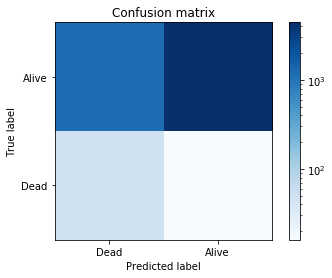

In [812]:
_ = plot_confusion_matrix(logr_confusion_matrix)

In [813]:
print(sklearn.metrics.classification_report(y_test, y_predicted, target_names= ['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       1.00      0.79      0.88      5599
        Dead       0.04      0.75      0.08        64

    accuracy                           0.79      5663
   macro avg       0.52      0.77      0.48      5663
weighted avg       0.99      0.79      0.87      5663



In [814]:
y_predicted_proba_logr = logr.predict_proba(X_test)

In [815]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='Precision recall curve curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Logistic Regression')    
    ax.legend(loc="lower right")    
    return fig, ax

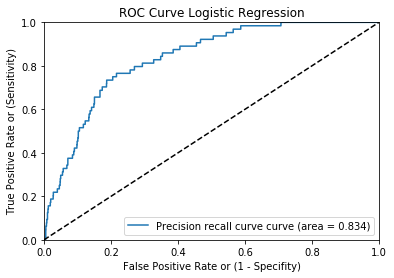

In [816]:
_ = plot_roc_curve(y_test, y_predicted_proba_logr)

In [187]:
clfTree = DecisionTreeClassifier(class_weight = 'balanced')

In [188]:
clfTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
cv = 3
accuracy_clfTree = cross_val_score(clfTree, X_train, y_train, cv = cv, scoring = "accuracy").mean()
recall_clfTree = cross_val_score(clfTree, X_train, y_train, cv = cv, scoring = "recall").mean()
precision_clfTree = cross_val_score(clfTree, X_train, y_train, cv = cv, scoring = "precision").mean()
# roc_auc_clfTree = cross_val_score(clfTree, X_train, y_train, cv = cv, scoring = "roc_auc").mean()
f1_clfTree = cross_val_score(clfTree, X_train, y_train, cv = cv, scoring = "f1").mean()
print('Accuracy: %.3f' % accuracy_clfTree)
print('Recall: %.3f' % recall_clfTree)
print('Precision: %.3f' % precision_clfTree)
# print('ROC_AUC: %.3f' % roc_auc_clfTree)
print('F1-score: %.3f' % f1_clfTree)

Accuracy: 0.735
Recall: 0.587
Precision: 0.582
F1-score: 0.581


In [188]:
y_predicted = clfTree.predict(X_test)

In [189]:
clfTree_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(clfTree_confusion_matrix)

[[ 890  647]
 [ 615 2718]]


In [190]:
true_positives, false_negatives, false_positives, true_negatives = clfTree_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 890
True negatives: 2718
False positives: 615
False negatives: 647


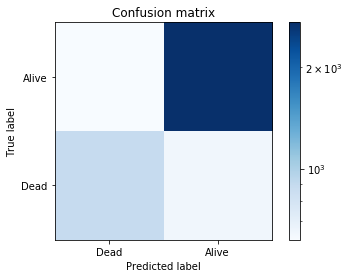

In [191]:
_ = plot_confusion_matrix(clfTree_confusion_matrix)

In [824]:
# clfTree_confusion_matrix_normalized = clfTree_confusion_matrix / clfTree_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(clfTree_confusion_matrix_normalized)

In [825]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfTree_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [826]:
# _ = plot_confusion_matrix(clfTree_confusion_matrix_normalized, title="Normalized confusion matrix")

In [192]:
y_predicted_proba_clfTree = clfTree.predict_proba(X_test)

In [193]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Classification Tree')    
    ax.legend(loc="lower right")    
    return fig, ax

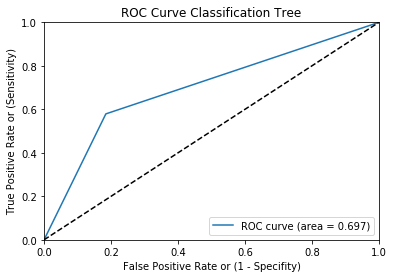

In [194]:
_ = plot_roc_curve(y_test, y_predicted_proba_clfTree)

In [830]:
clfTree_grid = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
                       param_grid = {'max_depth': np.arange(2,50),
                                    'min_samples_leaf': np.arange(2,20),
                                    },                                    
                       cv = 3,
                        scoring = 'f1'
                       )

In [831]:
clfTree_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             i...eprecated', n_jobs=None,
             param_grid={'ma

In [832]:
print('Best F1-score: %.3f' % clfTree_grid.best_score_) 
print('Best parameters: %s' % clfTree_grid.best_params_)

Best F1-score: 0.066
Best parameters: {'max_depth': 4, 'min_samples_leaf': 2}


In [190]:
clfRF = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')

In [191]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [192]:
cv = 3
accuracy_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "accuracy").mean()
recall_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "recall").mean()
precision_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "precision").mean()
f1_RF = cross_val_score(clfRF, X_train, y_train, cv=cv, scoring = "f1").mean()
print('Accuracy: %.3f' % accuracy_RF)
print('Recall: %.3f' % recall_RF)
print('Precision: %.3f' % precision_RF)
print('F1-score: %.3f' % f1_RF)

Accuracy: 0.802
Recall: 0.594
Precision: 0.725
F1-score: 0.654


In [836]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'recall')

In [837]:
# RF_grid.fit(X_train, y_train)

In [838]:
# print('Best recall score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [839]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'precision')

In [840]:
# RF_grid.fit(X_train, y_train)

In [841]:
# print('Best precision score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [842]:
# RF_grid = GridSearchCV(RandomForestClassifier(n_estimators = 50, class_weight = 'balanced'),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'f1')

In [843]:
# RF_grid.fit(X_train, y_train)

In [844]:
# print('Best F1-score: %.3f' % RF_grid.best_score_) 
# print('Best parameters: %s' % RF_grid.best_params_)

In [199]:
y_predicted = clfRF.predict(X_test)

In [200]:
RF_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_predicted, labels=[True, False]) 
print(RF_confusion_matrix)

[[ 938  599]
 [ 320 3013]]


In [201]:
true_positives, false_negatives, false_positives, true_negatives = RF_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 938
True negatives: 3013
False positives: 320
False negatives: 599


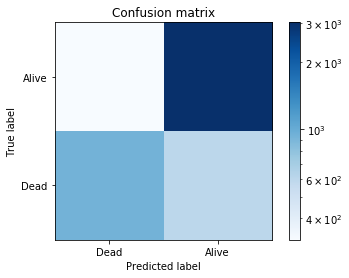

In [202]:
_ = plot_confusion_matrix(RF_confusion_matrix)

In [849]:
# RF_confusion_matrix_normalized = RF_confusion_matrix / RF_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(RF_confusion_matrix_normalized)

In [850]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = RF_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [851]:
# _ = plot_confusion_matrix(RF_confusion_matrix_normalized, title="Normalized confusion matrix")

In [203]:
y_predicted_proba_RF = clfRF.predict_proba(X_test)

In [204]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Random Forest')    
    ax.legend(loc="lower right")    
    return fig, ax

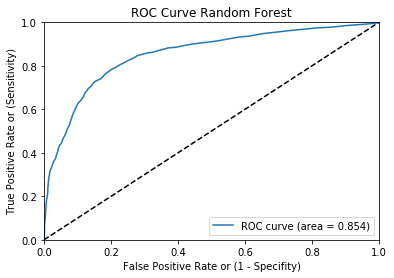

In [205]:
_ = plot_roc_curve(y_test, y_predicted_proba_RF)

In [193]:
clfGB = GradientBoostingClassifier(n_estimators = 1000, loss="exponential")

In [194]:
clfGB.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [195]:
cv = 3
accuracy_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="accuracy").mean()
recall_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_GB = cross_val_score(clfGB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Accuracy: %.3f' % accuracy_GB)
print('Recall: %.3f' % recall_GB)
print('Precision: %.3f' % precision_GB)
print('F1-score: %.3f' % f1_GB)

Accuracy: 0.809
Recall: 0.632
Precision: 0.726
F1-score: 0.676


In [858]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'recall')

In [859]:
# GB_grid.fit(X_train, y_train)

In [860]:
# print('Best recall score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [861]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'precision')

In [862]:
# GB_grid.fit(X_train, y_train)

In [863]:
# print('Best precision score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [864]:
# GB_grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 50),
#                        param_grid = {'max_depth': np.arange(2,25,3),
#                                     'max_features': ['auto','sqrt']},
#                        cv = 5,
#                        scoring = 'f1')

In [865]:
# GB_grid.fit(X_train, y_train)

In [866]:
# print('Best F1-score: %.3f' % GB_grid.best_score_) 
# print('Best parameters: %s' % GB_grid.best_params_)

In [210]:
y_predicted = clfGB.predict(X_train)

In [211]:
GB_confusion_matrix = sklearn.metrics.confusion_matrix(y_train, y_predicted, labels=[True, False]) 
print(GB_confusion_matrix)

[[ 4392  1746]
 [ 1141 12200]]


In [212]:
true_positives, false_negatives, false_positives, true_negatives = GB_confusion_matrix.ravel()
print('True positives: %d' % true_positives)
print('True negatives: %d' % true_negatives)
print('False positives: %d' % false_positives)
print('False negatives: %d' % false_negatives)

True positives: 4392
True negatives: 12200
False positives: 1141
False negatives: 1746


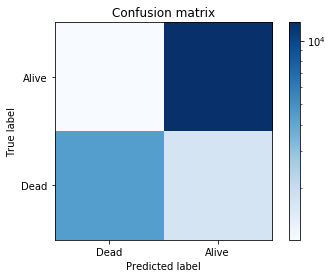

In [213]:
_ = plot_confusion_matrix(GB_confusion_matrix)

In [871]:
# clfGB_confusion_matrix_normalized = GB_confusion_matrix / GB_confusion_matrix.sum(axis=1)[ :, np.newaxis] 
# print(clfGB_confusion_matrix_normalized)

In [872]:
# true_positives_rate, false_negatives_rate, false_positives_rate, true_negatives_rate = clfGB_confusion_matrix_normalized.ravel()
# print('True positives: %.2f' % (true_positives_rate * 100))
# print('True negatives: %.2f' % (true_negatives_rate * 100))
# print('False positives: %.2f' % (false_positives_rate * 100))
# print('False negatives: %.2f' % (false_negatives_rate * 100))

In [873]:
# _ = plot_confusion_matrix(clfGB_confusion_matrix_normalized, title="Normalized confusion matrix")

In [214]:
y_predicted_proba_GB = clfGB.predict_proba(X_test)

In [215]:
def plot_roc_curve(y_test, y_predicted):    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_predicted[:,1])    
    roc_auc = sklearn.metrics.auc(fpr, tpr)    
    
    fig, ax = plt.subplots()    
    ax.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)    
    ax.plot([0, 1], [0, 1], 'k--') 
    ax.set_xlim([0.0, 1.0])    
    ax.set_ylim([0.0, 1.0])    
    ax.set_xlabel('False Positive Rate or (1 - Specifity)')    
    ax.set_ylabel('True Positive Rate or (Sensitivity)')    
    ax.set_title('ROC Curve Gradient Boost')    
    ax.legend(loc="lower right")    
    return fig, ax

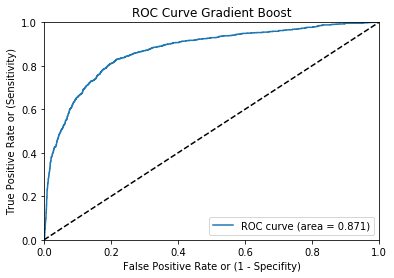

In [216]:
_ = plot_roc_curve(y_test, y_predicted_proba_GB)

In [196]:
clfAB = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)

In [197]:
clfAB.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=None)

In [198]:
cv = 3
recall_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="recall").mean()
precision_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="precision").mean()
f1_AB = cross_val_score(clfAB, X_train, y_train, cv=cv, scoring="f1").mean()
print('Recall: %.3f' % recall_AB)
print('Precision: %.3f' % precision_AB)
print('F1-score: %.3f' % f1_AB)

Recall: 0.639
Precision: 0.737
F1-score: 0.684


In [880]:
print('Recall: %.3f' % recall_GB)

Recall: 0.000


In [881]:
print(f"Recall: {recall_GB:.1%}")

Recall: 0.0%


In [882]:
import sys
sys.version

'3.7.4 (default, Aug 13 2019, 20:35:49) \n[GCC 7.3.0]'